# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [30]:
# Reading the data and understanding the data
df=pd.read_csv('webmd.csv')
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1




By looking at the head of the data we see that there are 12 features. 'Sides' can serve as our target variable. But it need some further processing as useful as a target variable.

In [31]:
 #check the shape of the given dataset
df.shape

(362806, 12)

Dataset has 362806 rows and 12 columns

In [32]:
#check the columns
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [33]:
#Check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [34]:
#Check the Description
df.describe(include='all')

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
count,362806,362806,362806,362806,362806.000000,362806.000000,362806.000000,362769,362806.000000,362806,362806,362806.000000
unique,12,1806,4524,7093,NaN,NaN,NaN,250167,NaN,3,1651,NaN
top,45-54,Other,10/29/2007,cymbalta,NaN,NaN,NaN,,NaN,Female,,NaN
freq,80043,49765,404,4648,NaN,NaN,NaN,41824,NaN,238226,17460,NaN
mean,NaN,NaN,NaN,NaN,36879.370774,4.019829,3.532061,NaN,3.135408,NaN,NaN,6.744916
std,NaN,NaN,NaN,NaN,52624.412971,1.317711,1.455961,NaN,1.611106,NaN,NaN,9.324240
min,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,4896.000000,3.000000,3.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,9548.000000,5.000000,4.000000,NaN,3.000000,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,63522.000000,5.000000,5.000000,NaN,5.000000,NaN,NaN,9.000000


According to this dataset
1. Most used drug is cymbalta, It will be intresting to see for what condition it is used.
2. People of age between 45 to 54 used more drugs.
3. Females are used more drugs.
4. Most single day review came on 10/29/2007.

In [37]:
#check for the null values 
df.isna().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

Here have null values in Reviews column only.

In [42]:
#check number of unique values in drug and condition
print(df['Drug'].nunique())
print(df['Condition'].nunique())

7093
1806


We can see that there are 7093 drugs and only 1806 conditions. So there are conditions which has multiple drugs.

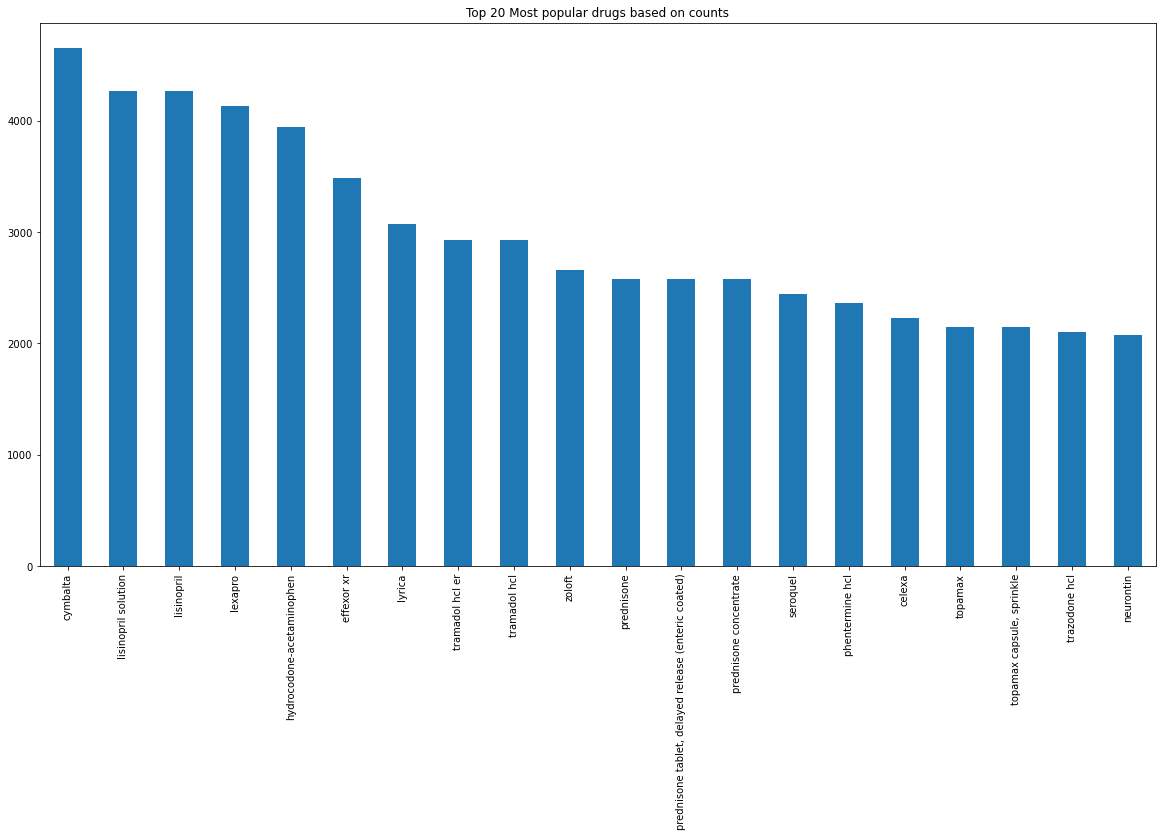

In [45]:
#plot a bargraph to check top 20 drugs used
plt.figure(figsize=(20,10))
df['Drug'].value_counts().nlargest(20).plot(kind='bar')
plt.title("Top 20 Most popular drugs based on counts")
plt.show()

From the graph
1. The top used drug is cymbalta.
2. The top 4 drugs has count around 4000 and above.
3. If we look at the top 20 most of the drugs counts are around 2000. 

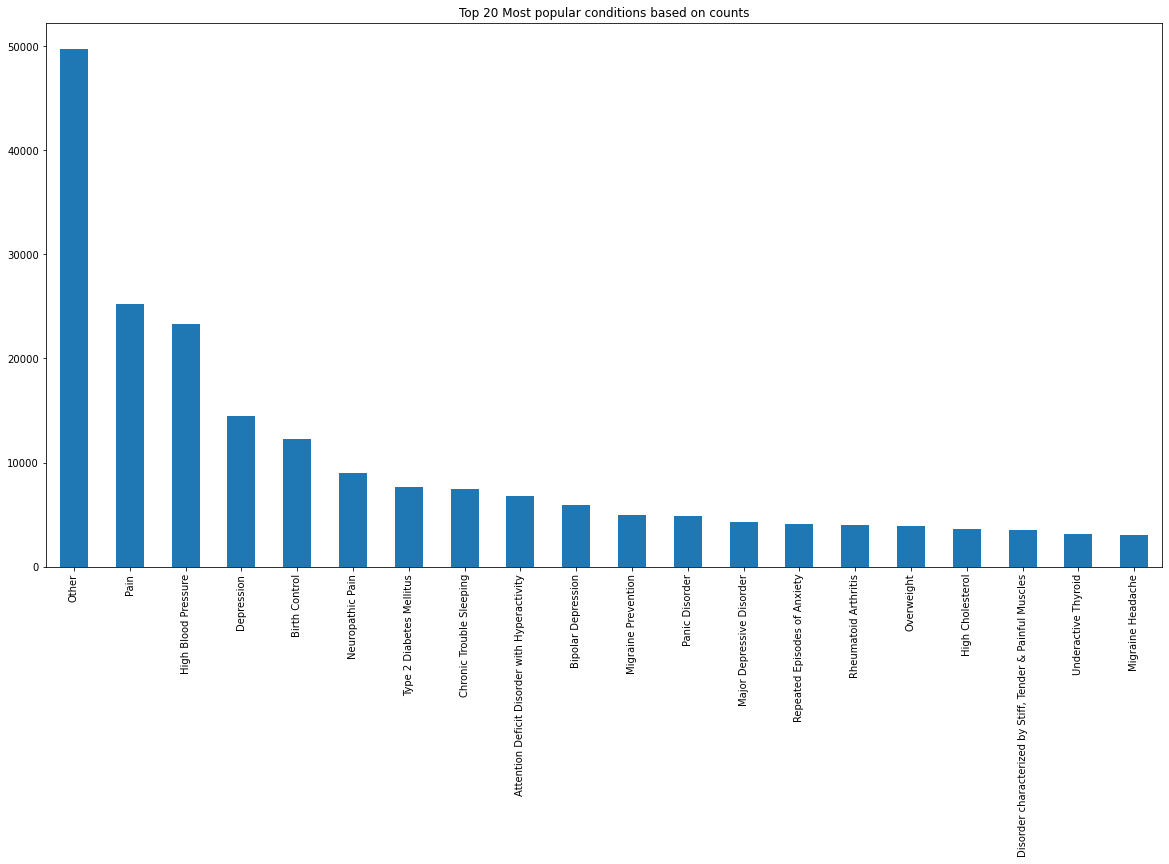

In [46]:
#plot a bargraph to check top 20 conditions
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title("Top 20 Most popular conditions based on counts")
plt.show()

From the graph
1. The top most condition is other than listed conditions.
2. The unlisted condition i.e, 'Other' comes around 50000 and above.
3. other than top one condition pain and high blood pressure conditions uses more medicine.

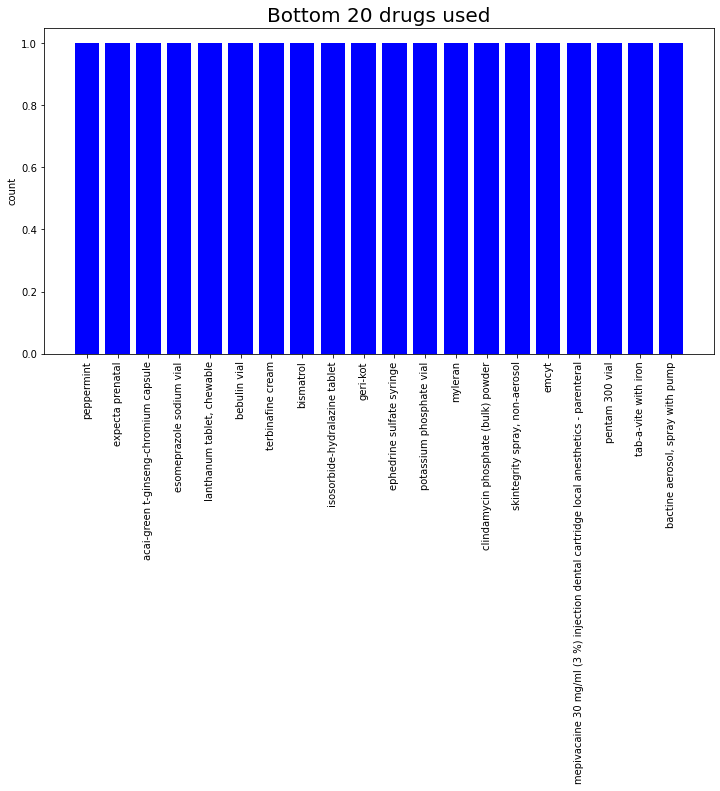

In [47]:
#plot a bargraph to check bottom 20 drugs used
plt.figure(figsize=(12,6))
drug_bottom=df['Drug'].value_counts(ascending = False).tail(20)

plt.bar(drug_bottom.index,drug_bottom.values,color='blue')
plt.title('Bottom 20 drugs used',fontsize = 20)
plt.xticks(rotation=90)
plt.ylabel('count')
plt.show()

From the above graph the each bottom 20 used drugs has count 1. These might be the drugs used of rare conditions or are new in market.

In [49]:
#Checking effectiveness Distribution
eff_=df['Effectiveness'].value_counts().sort_values(ascending=False).reset_index().\
rename(columns = {'index' :'Effectiveness', 'Effectiveness' : 'counts'})
eff_['percent'] = 100 * (eff_['counts']/df.shape[0])
print(eff_)

   Effectiveness  counts    percent
0              5  130388  35.938766
1              4   81821  22.552273
2              3   60406  16.649670
3              1   59387  16.368803
4              2   30801   8.489661
5              6       2   0.000551
6             10       1   0.000276


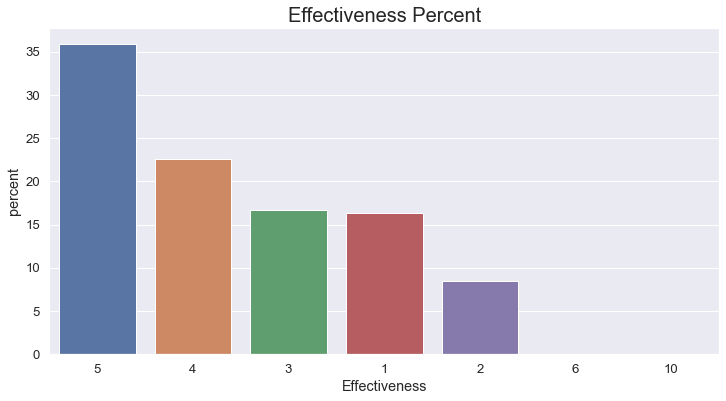

In [50]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [12, 6]
#let's plot and check
sns.barplot(x =eff_['Effectiveness'], y =eff_['percent'],order =eff_['Effectiveness'])
plt.title('Effectiveness Percent',fontsize=20)
plt.show()

Out of 10 the effectiveness of most of the drugs are 5 only. And others are below 5.

# Check the distribution of usefulCount

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


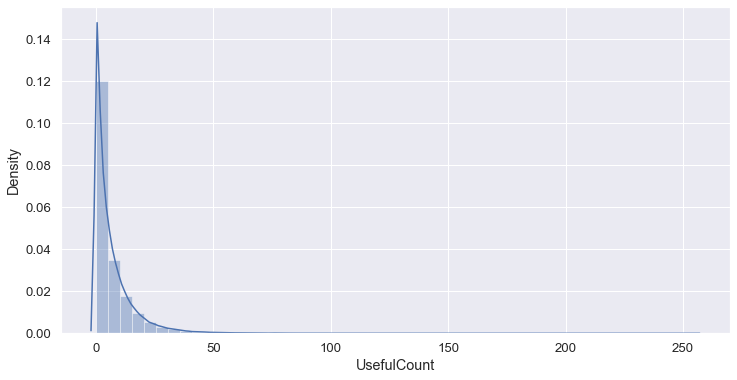

In [51]:
#plot a distribution plot of useful Count
sns.distplot(df['UsefulCount'])
plt.show()

From the above plot
1. usefulCount is positively-skewed.
2. Most of the usefulCounts are distributed between 0 and 50.
3. There are extreme outliers present in our usefulCounts.

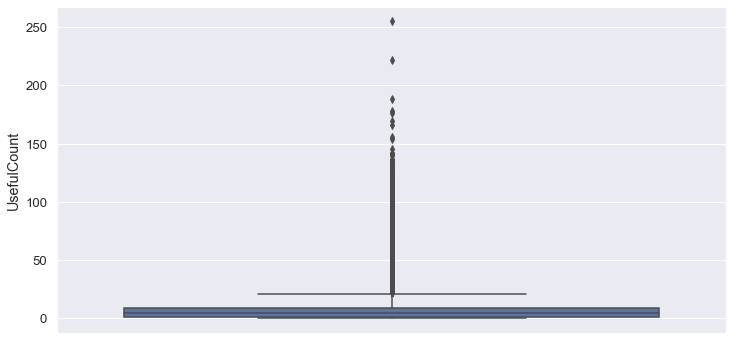

In [52]:
#check the descriptive summary
sns.boxplot(y=df['UsefulCount'])
plt.show()

It can see that there are huge outliers present in our dataset. Some drugs have extreme useful counts.

In [53]:
#Check number of Drugs per condition
df.groupby('Condition')['Drug'].nunique().sort_values(ascending=False).head(20)

Condition
Other                                         4469
Osteoporosis                                   229
Birth Control                                  204
Pain                                           202
High Blood Pressure                            200
Acne                                           197
Painful Periods                                161
Rheumatoid Arthritis                           148
Cough                                          137
Cold Symptoms                                  129
Inflammation of the Nose due to an Allergy     122
Type 2 Diabetes Mellitus                       117
Abnormally Long or Heavy Periods               111
Incomplete or Infrequent Bowel Movements       109
Stuffy Nose                                    108
Disease of Ovaries with Cysts                  103
Allergic Conjunctivitis                        102
Migraine Headache                               95
"Change of Life" Signs                          92
Atopic Dermatitis    

In [24]:
len(df['Sides'].unique().tolist())

1650

In [25]:
df['Sides'].value_counts()

                                                                                                                                                                                                       17454
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                                                                          15560
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.                                                       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                                                                 9158
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.                                          

<AxesSubplot:>

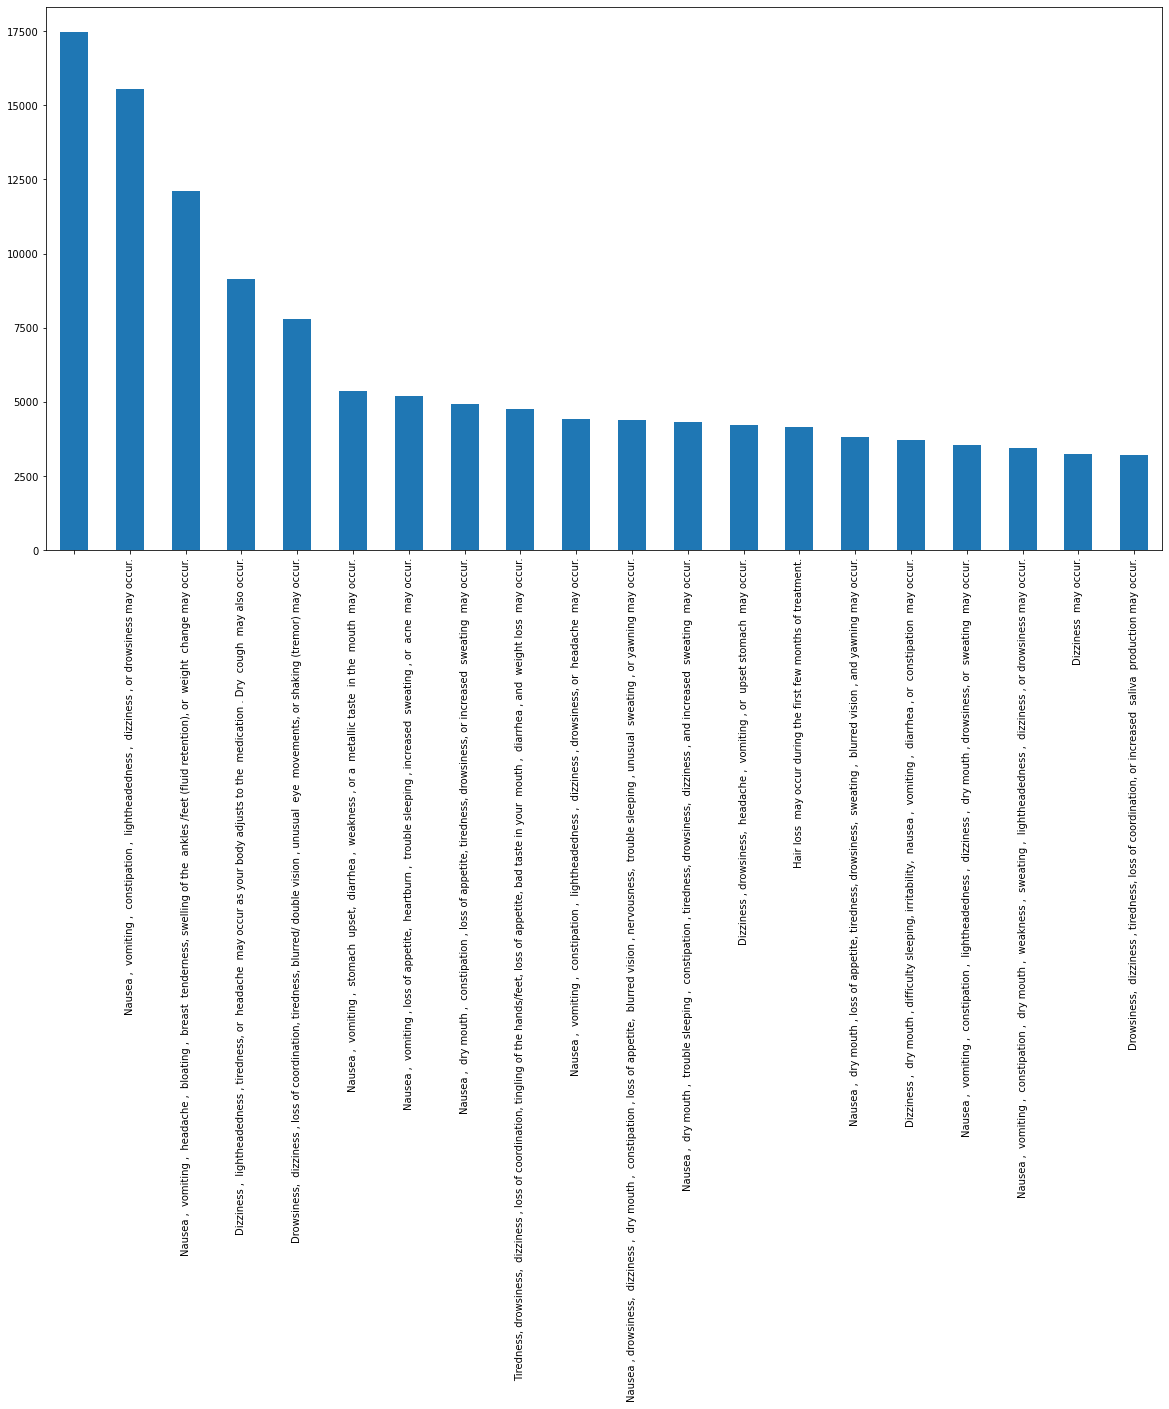

In [26]:
df['Sides'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))